In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
from pathlib import Path
sys.path.append("../iclr_17_compression/")
sys.path.append("../JIN_SRNet/JIN_SRNet/")
import torch
from test_model import plot_tensor
import random as rd
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from precover_processing import read_pgm

/home/lucas/.conda/envs/research/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path_to_covers = Path("../JIN_SRNet/BossBase-1.01-cover/")
path_to_stego = Path("../JIN_SRNet/stego_1e_4/")

cover_files = list(path_to_covers.glob("*.pt"))
stego_files = list(path_to_stego.glob("*.pt")) #we use glob because there is a txt file in stego folder

In [5]:
# id_random = rd.randint(0,len(cover_files))
# cover_file = list(path_to_covers.glob(f"*{id_random}*.pt"))[0]
# stego_file = list(path_to_stego.glob(f"*{id_random}*.pt"))[0]

# cover_t = torch.load(cover_file)
# stego_t = torch.load(stego_file) 
# print(cover_t.shape)
# # print(cover_t)
# plot_tensor(cover_t,"cover")
# plot_tensor(stego_t,"stego")

In [6]:
to_pil = transforms.ToPILImage()

# cover_np = np.array(to_pil(cover_t[0])).astype(int)
# stego_np = np.array(to_pil(stego_t[0])).astype(int)

# diff = np.abs(cover_np - stego_np)
# plt.imshow(diff[:,:,0])
# plt.colorbar()

In [7]:
# np.save("../jan/cover.npy",cover_np)
# np.save("../jan/stego_0_1.npy",stego_np)

In [8]:
def load_tensor_as_np(file: str):
    return np.array(to_pil(torch.load(file)[0])).astype(int)

In [9]:
# cover = np.load("../cover_stego/cover.npy")
# stego = load_tensor_as_np("../cover_stego/1008.pt") # generated with image nb 10

In [10]:
# plt.imshow(np.abs(cover-stego_01)[:,:,0])
# plt.colorbar()
# plt.show()

In [11]:
# plt.imshow(np.abs(cover-stego)[:,:,0])
# plt.colorbar()

In [12]:
# np.save("../cover_stego/stego_p_0_01.npy",stego)

In [13]:
# plt.imshow(np.load("../cover_stego/stego_p_0_01.npy"))

In [14]:
precover = read_pgm("../JIN_SRNet/BossBase-1.01-precover/1008.pgm")
cover_np = load_tensor_as_np("../JIN_SRNet/BossBase-1.01-cover/1008.pt")
stego_0_1 = load_tensor_as_np("./stego/1008/0_1.pt")
stego_0_01 = load_tensor_as_np("./stego/1008/0_01.pt")
stego_0_001 = load_tensor_as_np("./stego/1008/0_001.pt")
stego_0_0001 = load_tensor_as_np("./stego/1008/0_0001.pt")

Text(0.5, 1.0, 'Uncompressed')

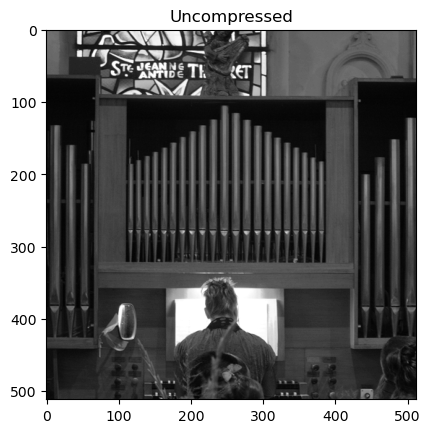

In [15]:
plt.imshow(precover,cmap="gray")
plt.title("Uncompressed")

In [16]:
# plt.figure(figsize=(20,20))
plt.imshow(cover_np)
plt.title("cover")

Text(0.5, 1.0, 'cover')

Text(0.5, 1.0, 'stego p=0.1')

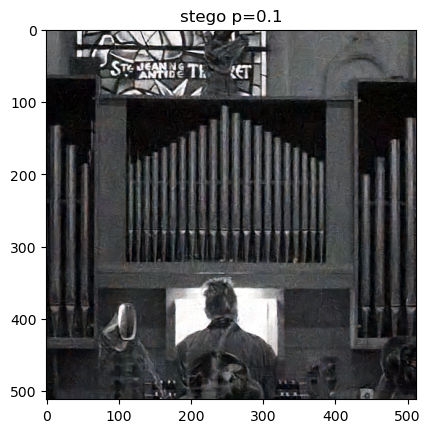

In [17]:
plt.imshow(stego_0_1)
plt.title("stego p=0.1")

Text(0.5, 1.0, 'p = 0.01')

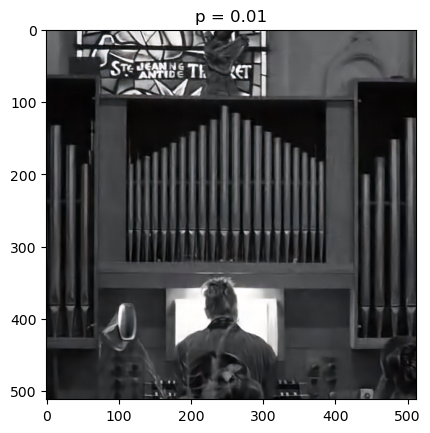

In [18]:
plt.imshow(stego_0_01)
plt.title("p = 0.01")

Text(0.5, 1.0, '|cover-stego| ; p = 0.1')

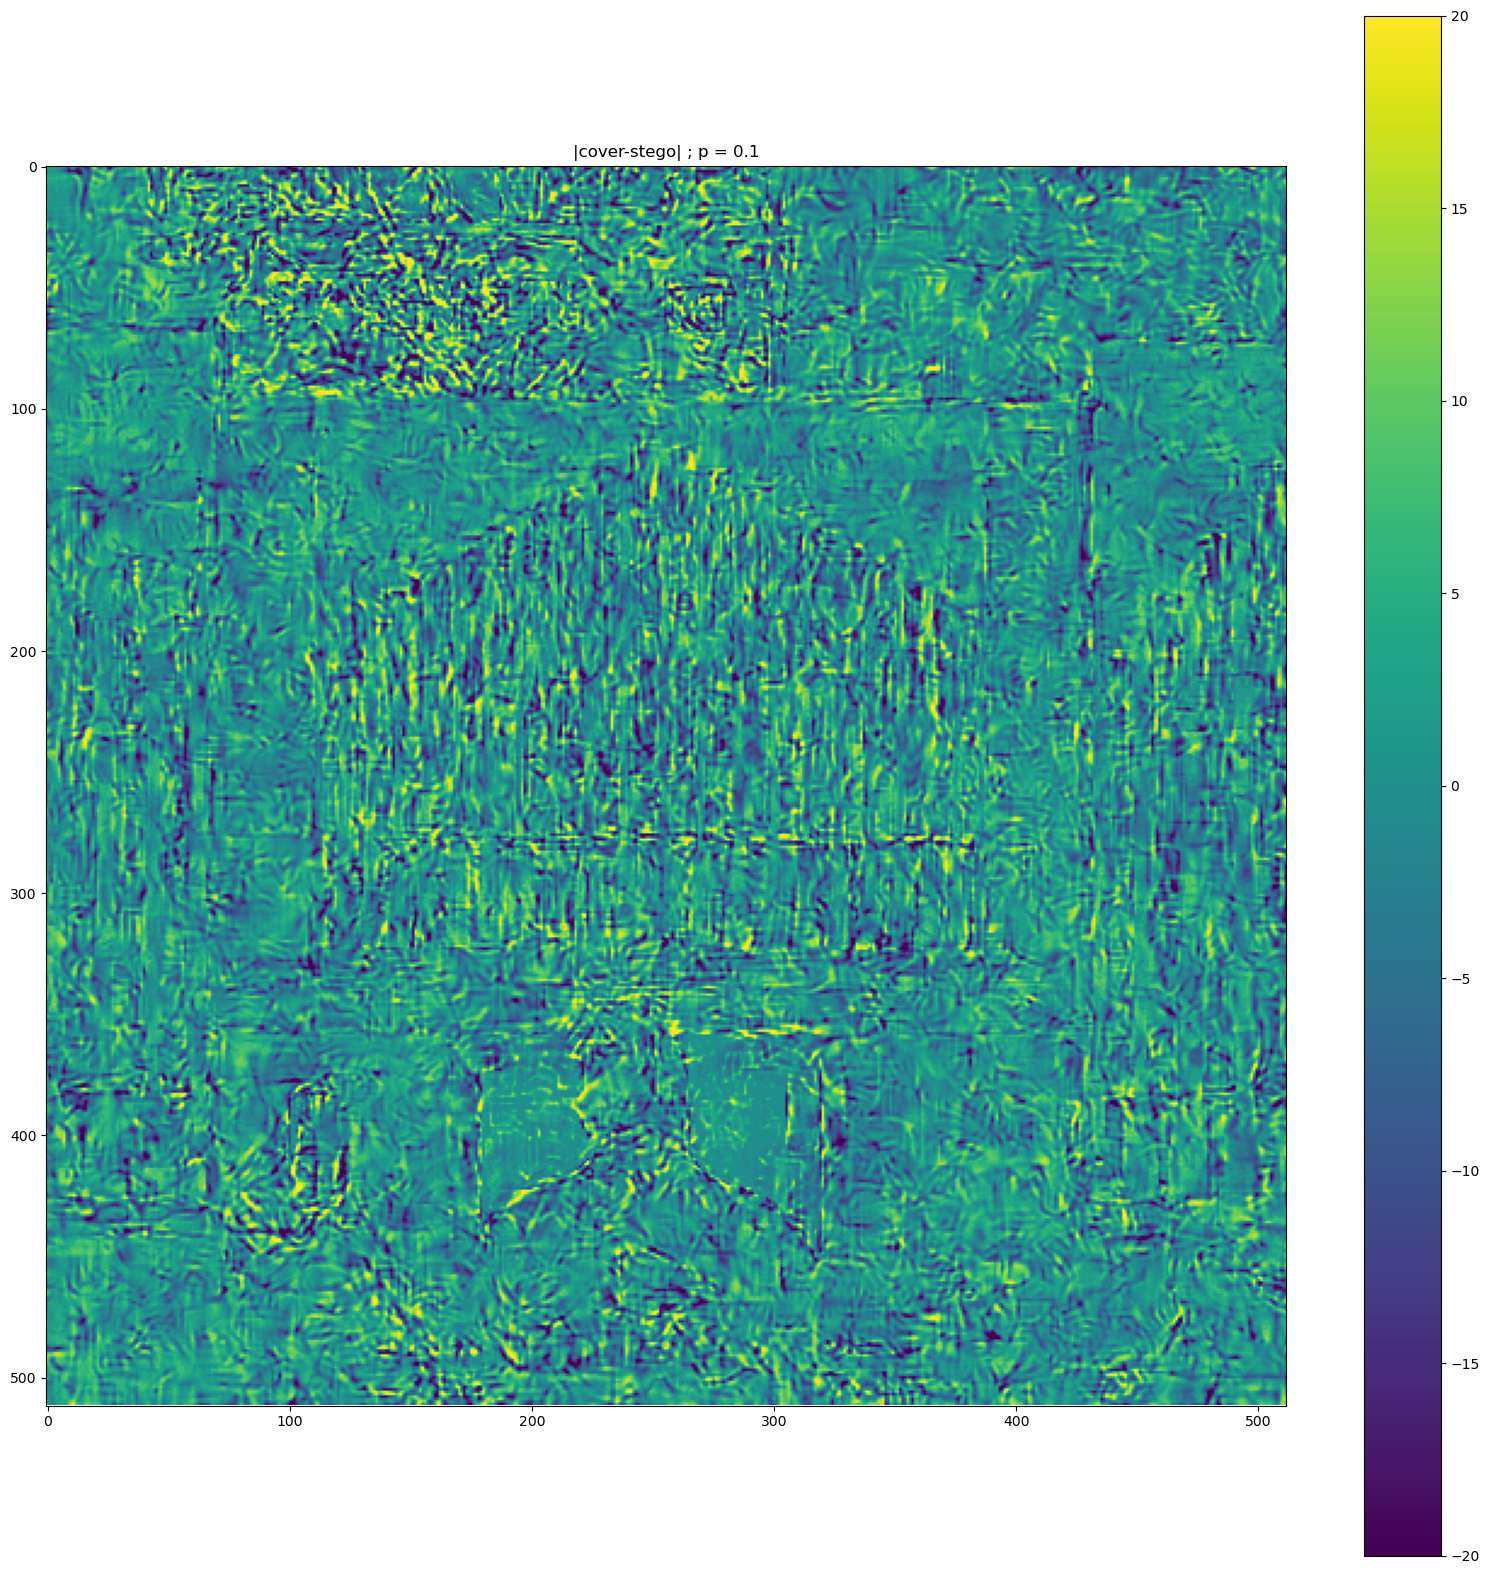

In [19]:
diff = (cover_np-stego_0_1)[:,:,0]
diff2 = np.clip(diff,-20,20)
plt.figure(figsize=(20,20))
plt.imshow(diff2)
plt.colorbar()
plt.title("|cover-stego| ; p = 0.1")

Text(0.5, 1.0, '|cover - stego| ; p = 0.01')

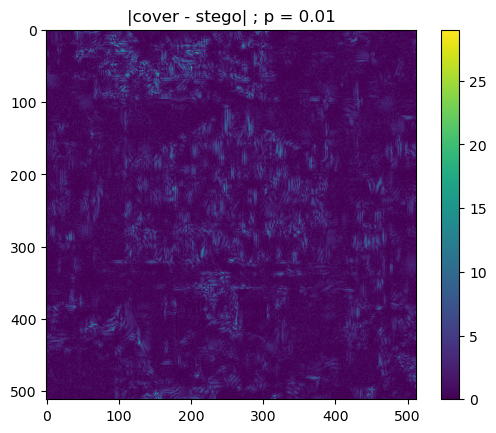

In [20]:
plt.imshow(np.abs(cover_np-stego_0_01)[:,:,0])
plt.colorbar()
plt.title("|cover - stego| ; p = 0.01")

Text(0.5, 1.0, '|cover-stego| ; p=0.001')

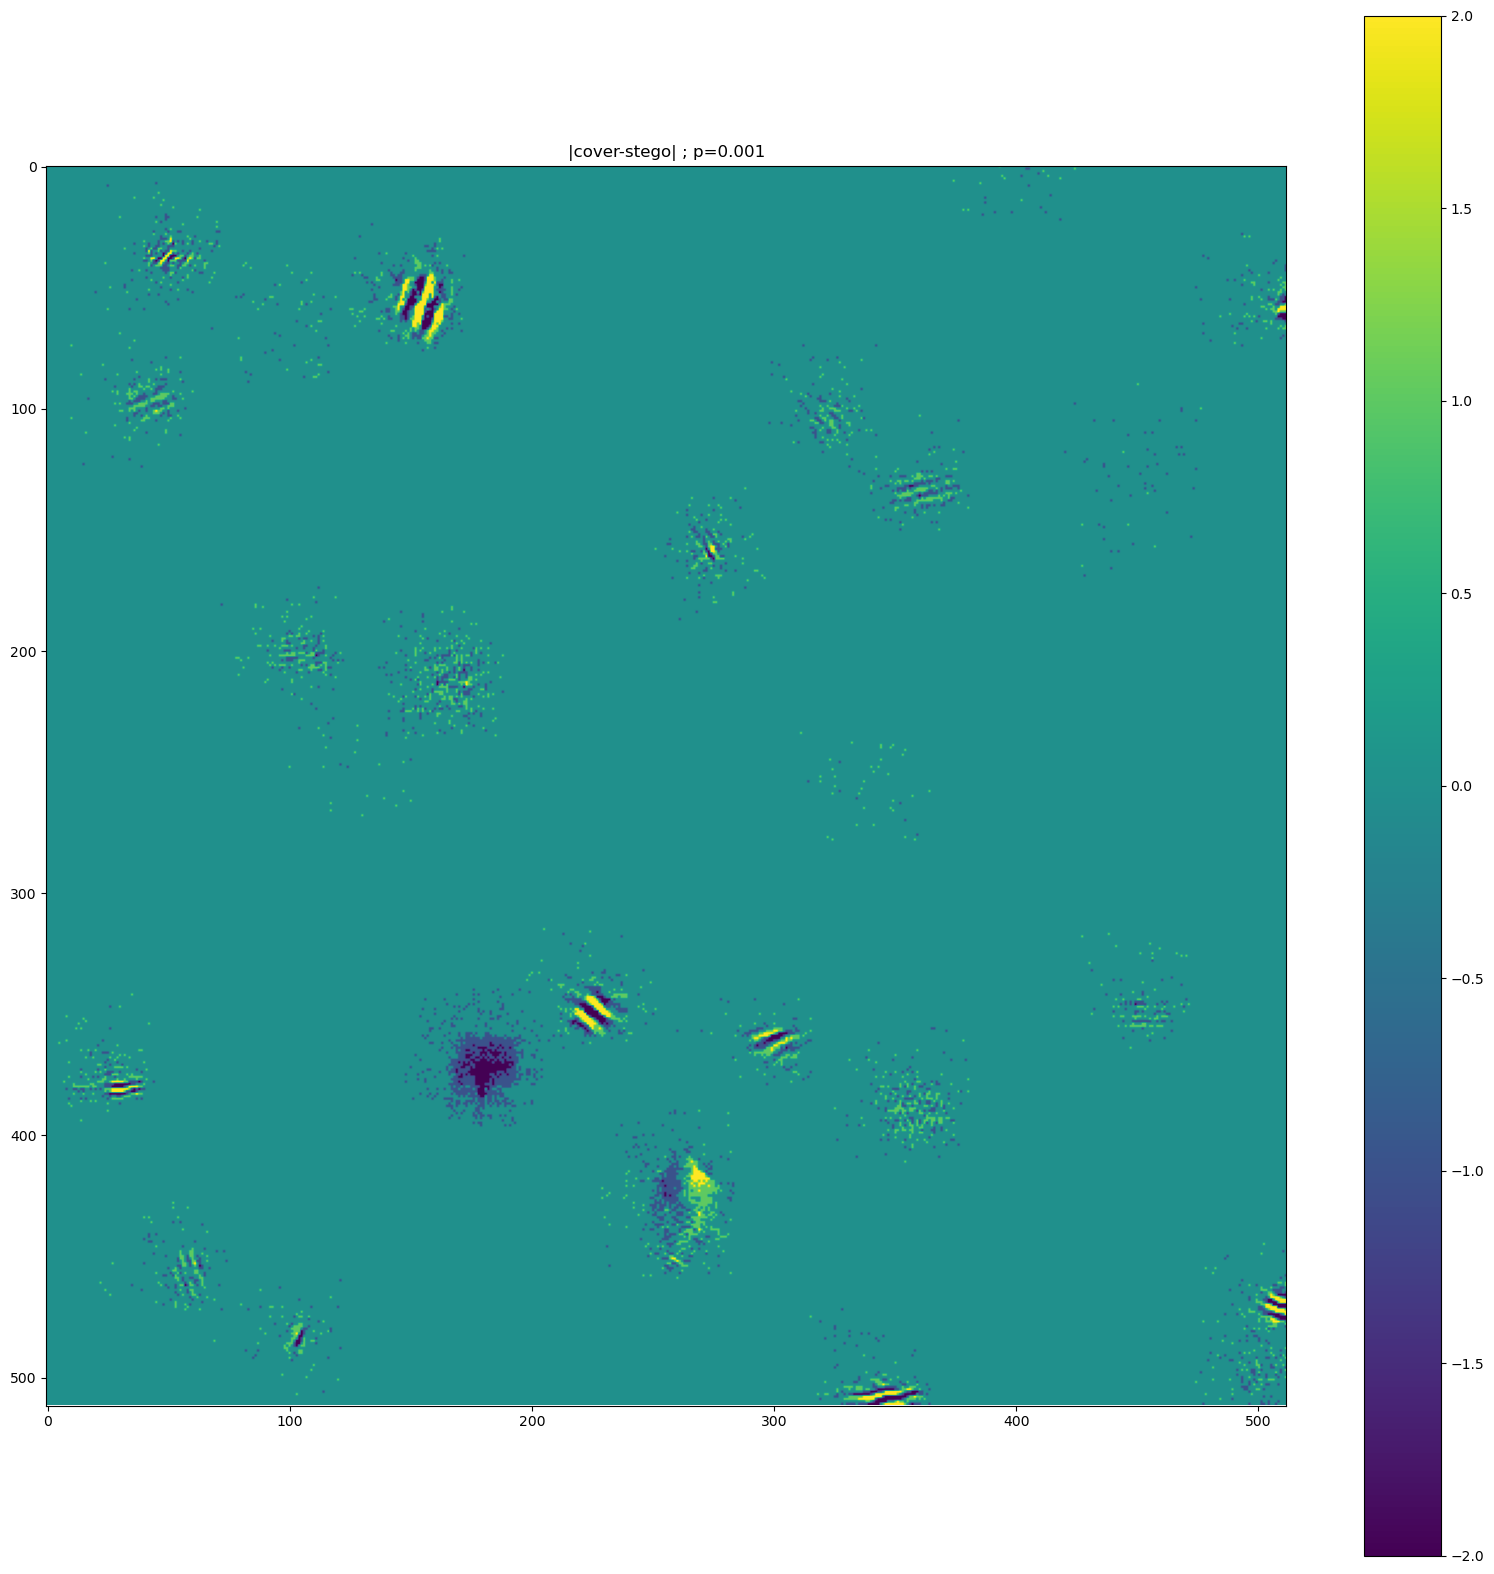

In [21]:
diff = (cover_np-stego_0_0001)[:,:,0]
diff2 = np.clip(diff,-2,2)
plt.figure(figsize=(20,20))
plt.imshow(diff2)
plt.colorbar()
plt.title("|cover-stego| ; p=0.001")